Solving linear equations least squares problem

# Ax = b 

Overdetermined vs. Underdetermined Systems

Overdetermined System (More Equations than Unknowns)
Condition: 

m > n (more rows than columns)

    2x+y = 5
    x−y = 1 
    x+2y = 4    => x , y ?
​

Usually, there is no exact solution because the system is inconsistent (too many constraints).

Underdetermined System (More Unknowns than Equations)

Condition: 

m < n (more columns than rows)

    x + y + z = 1 
    x - y = 2       => x , y, z ?

    This system has infinitely many solutions because there aren't enough constraints.


Compute the Minimal-Norm Solution Using SVD (x_min)

Solve the overdetermined system: Ax=b 




In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Example: Predicting house prices based on size and number of bedrooms
# Data: [Size (sq ft), Number of Bedrooms]
A = np.array([[1400, 3],
              [1600, 3],
              [1700, 3],
              [1875, 4],
              [1100, 2]])

# Prices (target values in $1000s)
b = np.array([245, 312, 279, 308, 199])


print('Matrix A : ')

print(A)

print(f'Vector b : {b}')



Matrix A : 
[[1.400e+03 3.000e+00 1.000e+00 1.000e+00]
 [1.600e+03 3.000e+00 1.000e+00 1.000e+00]
 [1.700e+03 3.000e+00 1.000e+00 1.000e+00]
 [1.875e+03 4.000e+00 1.000e+00 1.000e+00]
 [1.100e+03 2.000e+00 1.000e+00 1.000e+00]]
Vector b : [245 312 279 308 199]


find a least squares solution using SVD 

# A=UΣV^T



Where U and V are orthogonal matrices , Σ is a diagonal matrix.

Compute the pseudoinverse A+ :
𝐴+ = VΣ+U^T
 

Σ+  is the inverse of nonzero singular values.

x = A+ b 

In [23]:
# Compute SVD
U, S, Vt = np.linalg.svd(A, full_matrices=False)

# Compute pseudo-inverse of A
S_inv = np.diag(1 / S)
A_pseudo = Vt.T @ S_inv @ U.T

# Compute least squares solution 
x = A_pseudo @ b

print("Solution x:", x)
print()

# Predict price of a new house (e.g., 1500 sq ft, 3 bedrooms)
new_house = np.array([1500, 3, 1])  # Include intercept term
predicted_price = new_house @ x
print(f"Predicted price for a 1500 sq ft house with 3 bedrooms: ${predicted_price * 1000:.2f}")

# Plot best fit line
plt.scatter(X[:, 0], y, color='blue', label='Data')
x_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_vals = w[0] * x_vals + w[1] * np.mean(X[:, 1]) + w[2]
plt.plot(x_vals, y_vals, color='red', label='Best Fit Line')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price ($1000s)')
plt.title('Best Fit Line for House Prices')
plt.legend()
plt.show()

Solution x: [ 1.68996540e-01 -1.34933541e+01  3.34444392e+16 -3.34444392e+16]



ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 3)

What can we do with x ? 

1. Use the fitted line equation to predict new values.
2. Visualize the fitted model along with the new predictions on the graph.

IndexError: index 2 is out of bounds for axis 0 with size 2

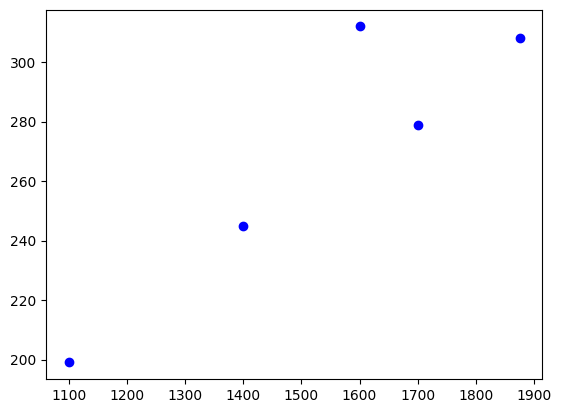

In [17]:

# Plot best fit line
plt.scatter(X[:, 0], y, color='blue', label='Data')
A_vals = np.linspace(min(A[:, 0]), max(A[:, 0]), 100)
b_vals = x[0] * A_vals + x[1] * np.mean(A[:, 1]) + x[2]
plt.plot(A_vals, b_vals, color='red', label='Best Fit Line')
plt.xlabel('Size (sq ft)')
plt.ylabel('Price ($1000s)')
plt.title('Best Fit Line for House Prices')
plt.legend()
plt.show()



Least squares solution: [1.5 0.5]
Residual vector: [ 4.5  1.5 -1.5]
Residual norm (error magnitude): 4.9749371855331


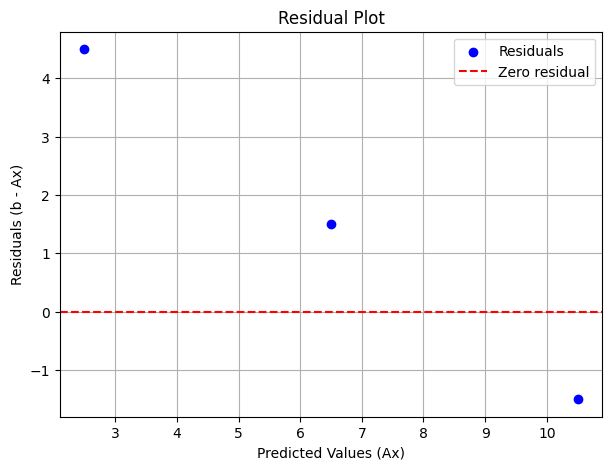

In [5]:
# Compute residuals
residuals = b - A @ x
residual_norm = np.linalg.norm(residuals)
print("Least squares solution:", x)
print("Residual vector:", residuals)
print("Residual norm (error magnitude):", residual_norm)


# Compute predicted values
predicted_values = A @ x

# Plot residuals
plt.figure(figsize=(7, 5))
plt.scatter(predicted_values, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero residual')
plt.xlabel('Predicted Values (Ax)')
plt.ylabel('Residuals (b - Ax)')
plt.title('Residual Plot')
plt.legend()
plt.grid(True)
plt.show()